# PREDIKSI PELANGGAN YANG AKAN MEMBATALKAN PEMESANAN HOTEL

Created By : Nashrul Fath

**Pendahuluan**

Dalam bisnis properti pembatalan pesanan kamar hotel merupakan suatu yang sangat merugikan dan itu sudah menjadi tantangan bagi pemilik hotel. Tingginya tingkat pembatalan sangat berdampak pada operasional dan pendapatan perusahaan, Tujuan dari model ini memprediksi sebanyak mungkin pelanggan yang akan membatalkan pemesanan kamar hotel menggunkana matriks evaluasi recall.


**Goals**

memprediksi sebanyak mungkin pelanggan yang akan membatalkan pemesanan kamar hotel menggukan matrisk evaluasi recall

**Stakeholder**
- Manajemen pelayanan hotel
- Kepentingan manajemen pelayanan hotel adalah menigkatkan efisiensi operasional dan meminimalkan kerugian terhadap pembatalna pemesanan kamar hotel

**Rumusan masalah**
- Model apa yang baik dalam memprediksi pelanggan yang akan berpotensi akan membatalkan pemesanan hotel menggunakan matriks evaluasi recall ?
- apakah model yang di dapatkan akan bagus di data baru ?
- Seberapa baik recall dalam model anda menangakap pelanggan yang akan membatalkan pemesanan hotel ?
- Apa kekurangan dari model yang di dapatkan
- Bagaimana pengambilan keputusan dan srategi setelah model prediksi pelanggan yang akan mebatalkan pemesananya ?


### PENJELASAN FITUR
- *country* (Negara asal):  negara tempat pemesanan dilakukan. ini berguna untuk memahami demografi pelanggan.
- *market_segment*(Segmentasi pasar): Mengkategorikan jenis pelanggan atau jenis pemesanan. 
- *previous_cancellations* (Jumlah pembatalan sebelumnya): Riwayat pemesanan pembatalan pelanggan.
- *booking_changes* (Jumlah perubahan pemesanan): Menghitung  perubahan yang dilakukan setelah pemesanan.
- *deposit_type*(Jenis deposit): Menunjukkan apakah deposit dibayarkan untuk menjamin pemesanan.
- *days_in_waiting_list* (Jumlah hari dalam daftar tunggu): Melihat waktu pemesanan yang dihabiskan dalam daftar tunggu sebelum dikonfirmasi. 
- *customer_type* (Jenis pelanggan): Mengklasifikasikan jenis pemesanan, apakah "Transient" (Individu), "Contract" (Kontrak), "Group" (Grup), atau "Transient-Party" (Bagian dari Grup).
- *reserved_room_type* (Tipe kamar yang dipesan): jenis kamar yang dipesan.
- *required_car_parking_space* (Jumlah tempat parkir yang dibutuhkan):  berapa banyak tempat parkir yang dipesan pelanggan.
- *total_of_special_request* (Jumlah permintaan khusus): Menghitung jumlah permintaan khusus, seperti jenis tempat tidur tertentu, lantai atas, kamar bebas rokok, dll.
- *is_canceled*(Apakah dibatalkan): Ini adalah variabel target atau variabel dependen. Ini menunjukkan apakah pemesanan akhirnya dibatalkan (1) atau tidak (0).



In [38]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import cross_val_score, StratifiedKFold 
from sklearn.preprocessing import RobustScaler

# EDA

In [39]:
data = pd.read_csv('data_hotel_booking_demand.csv')
data

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [41]:
data.isnull().sum()

country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

didalam colom country ada 351 data yang hilang

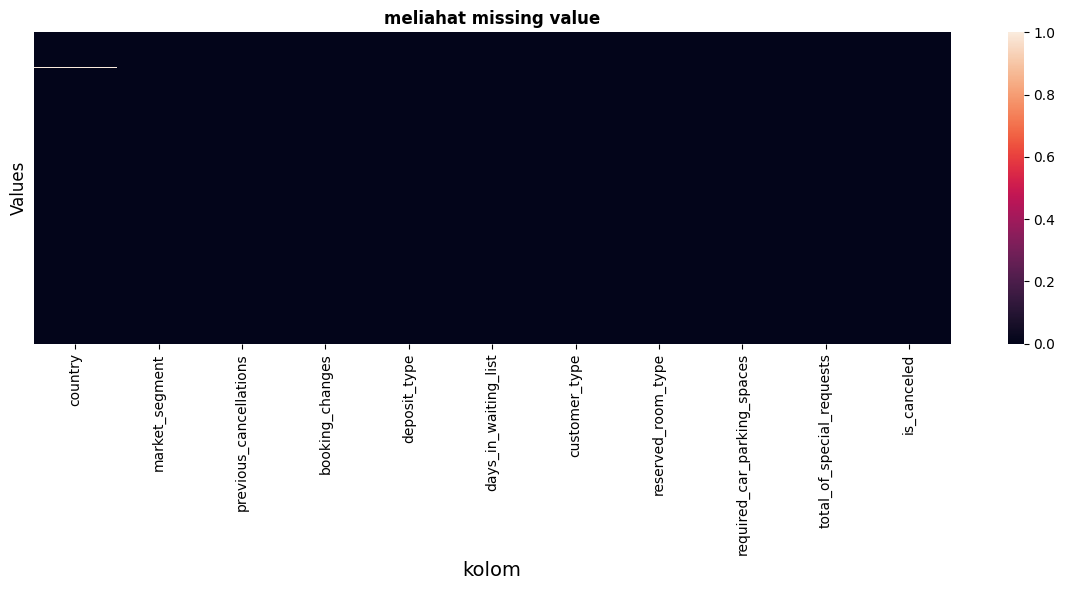

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), yticklabels=False)
plt.title('meliahat missing value', weight='bold')
plt.xlabel('kolom', fontsize=14)
plt.ylabel('Values', fontsize=12)
plt.tight_layout()

kita tidak memasukan fitur country sebagai fitur nantinya karena, Jika kolom "Country" digunakan dalam model, akan mengakibatkan muncul bias terhadap pelanggan dari negara tertentu. di karenakan mising velue hanya ada di kolom country, maka kita tidak melakukan penghapusan mising velue karena kolom country akan kita hapus.

In [43]:
data.duplicated().sum()

73371

ini terlalu banyak data yang terduplikat, kita akan melihat kombinasi fitur yang banyak terduplikat

In [44]:
data[data.duplicated()].value_counts().reset_index()


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,count
0,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1,4079
1,PRT,Offline TA/TO,0,0,Non Refund,0,Transient,A,0,0,1,1850
2,PRT,Groups,0,0,No Deposit,0,Transient-Party,A,0,0,1,1046
3,PRT,Online TA,0,0,No Deposit,0,Transient,A,0,1,0,948
4,PRT,Online TA,0,0,No Deposit,0,Transient,A,0,0,1,796
...,...,...,...,...,...,...,...,...,...,...,...,...
4686,IRL,Online TA,0,0,No Deposit,0,Transient-Party,A,1,2,0,1
4687,IRL,Online TA,0,0,No Deposit,0,Transient-Party,A,1,0,0,1
4688,IRL,Online TA,0,0,No Deposit,0,Transient-Party,A,0,3,0,1
4689,IRL,Online TA,0,0,No Deposit,0,Transient-Party,A,0,2,1,1


In [45]:
df = data[data.duplicated()]
print(f"Jumlah duplikat: {df.shape[0]} dari {data.shape[0]}") 
df_drop= data.drop_duplicates()
print(f"Jumlah data unik: {df_drop.shape[0]}")

Jumlah duplikat: 73371 dari 83573
Jumlah data unik: 10202


- duplikat data sangat banyak dan kita harus menghapus data duplikatnya di karenakan bisa membuat model kita bisa oferfiting
- menurut Muhammda Daffa Rachman dan Apriade Voutama keberadaan duplikat pada data akan mengakibatkan analisis staistik dengan hasilnya tidak akurat
- sumber = https://www.researchgate.net/publication/381642835_IMPLEMENTASI_ALGORITMA_K-MEANS_DALAM_SISTEM_REKOMENDASI_MUSIK_MENGGUNAKAN_PYTHON/fulltext/6678488cd21e220d89cb8389/IMPLEMENTASI-ALGORITMA-K-MEANS-DALAM-SISTEM-REKOMENDASI-MUSIK-MENGGUNAKAN-PYTHON.pdf

In [46]:
df_drop['country'].value_counts()


country
PRT    1993
GBR     734
ESP     641
FRA     612
DEU     432
       ... 
LCA       1
ZMB       1
GTM       1
UMI       1
AIA       1
Name: count, Length: 162, dtype: int64

Negara yang paling banyak melakukan pesanan adalah PRT(portugal) dan ada beberapa negara

In [47]:
df_drop['customer_type'].value_counts()

customer_type
Transient          6911
Transient-Party    2566
Contract            481
Group               244
Name: count, dtype: int64

kebanyakan yang memesan kamar Pelanggan Transient (67.7%) 

In [48]:
df_drop['reserved_room_type'].value_counts()

reserved_room_type
A    4627
D    2042
E    1268
F     720
G     553
B     454
C     340
H     192
P       4
L       2
Name: count, dtype: int64

Tipe kamar A paling banyak dipesan (45.3%), Ini menunjukan kamar tipe A paling di minati.

In [49]:
df_drop['deposit_type'].value_counts()

deposit_type
No Deposit    9960
Non Refund     195
Refundable      47
Name: count, dtype: int64

Kebanyakan pelanggan memilih "No Deposit" (98.0%)
Ini menunjukkan bahwa pelanggan tidak ingin membayar deposit di awal, ini karena ketidakpastian rencana pemesanan.

In [50]:
df_drop['is_canceled'].value_counts()

is_canceled
0    7788
1    2414
Name: count, dtype: int64

Ada 23.7% pemesanan dibatalkan, yang berarti hampir 1 dari 4 pemesanan tidak jadi dilakukan.

In [51]:
df_drop['market_segment'].value_counts()

market_segment
Online TA        4945
Direct           2136
Offline TA/TO    1482
Groups            848
Corporate         528
Complementary     181
Aviation           81
Undefined           1
Name: count, dtype: int64

kebanyakan pelanggan menggunakan platform online untuk reservasi. Ini menunjukkan bahwa strategi pemasaran digital sangat penting.

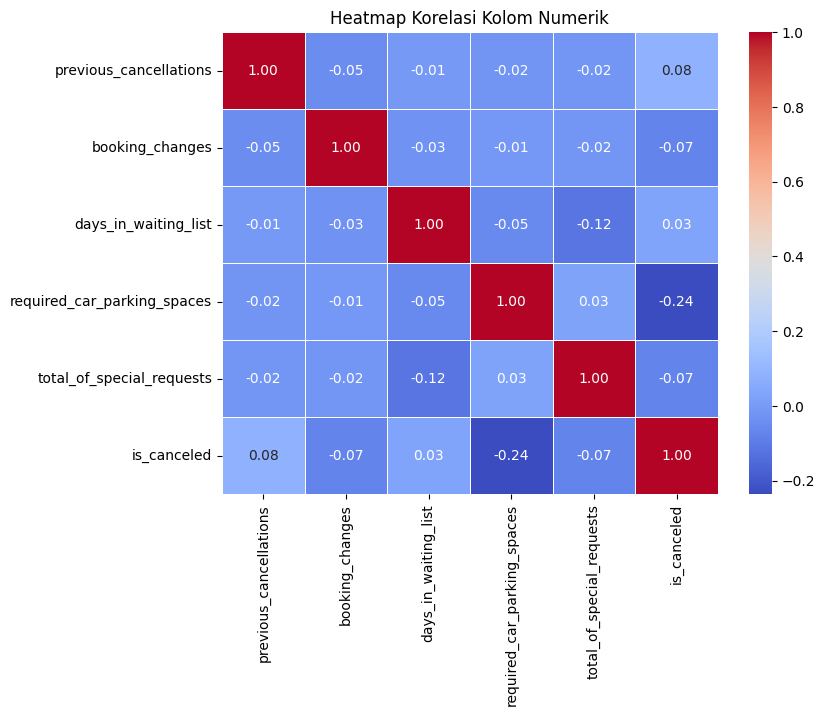

In [52]:
int_kolom = ['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
            'required_car_parking_spaces', 'total_of_special_requests', 'is_canceled']
corr_matrix = df_drop[int_kolom].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Kolom Numerik")
plt.show()


heatmap diatas menunjukan bahwa korelasi antara fitur tidak begitu berhubungan yang kuat, kita akan melihat apakah benar fitur tersebut tidak saling berkorelasi dengan menggunakan uji multikolenieritas

### malihat multikorelialitas fitur

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc(df_drop, int_kolom):
    X = df_drop[int_kolom]  
    vif = pd.DataFrame()
    vif['feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif
vif_result = vif_calc(df_drop, int_kolom)

In [54]:
vif_result

,feature,VIF
0,previous_cancellations,1.015752
1,booking_changes,1.166928
2,days_in_waiting_list,1.013273
3,required_car_parking_spaces,1.110898
4,total_of_special_requests,1.276838
5,is_canceled,1.135402


nilai toleransi adalah 5, nilai vif diatas menunjukan semua fitur memiliki nilai 1, ini menunjukan bahwa fitur tidak saling berkorelasi, apabila nilai vif > 5 maka fitur mengalami multikoleniaritas dan apabila < 5 maka bisa dikatakan fitur tidak mengalami multikoleniaritas

In [55]:
df_drop[['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
            'total_of_special_requests']].describe()

,previous_cancellations,booking_changes,days_in_waiting_list,total_of_special_requests
count,10202.000000,10202.000000,10202.000000,10202.000000
mean,0.089296,0.795040,3.560282,0.941188
std,0.828474,1.293224,22.196636,1.037986
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,2.000000
max,26.000000,21.000000,391.000000,5.000000


kalau kita melihat dari perbandingan mena dan std menunjukan kolom yang mungkin tidak memiliki outlier adalah kolom total_of_special_requests, dimana perbedaan antara mean dan std tidak jauh secara signifikan yang artinya  datanya homogen

# MELIHAT OUTLIER FITUR

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20896\335031899.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels([""])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20896\335031899.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels([""])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20896\335031899.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels([""])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20896\335031899.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels([""])


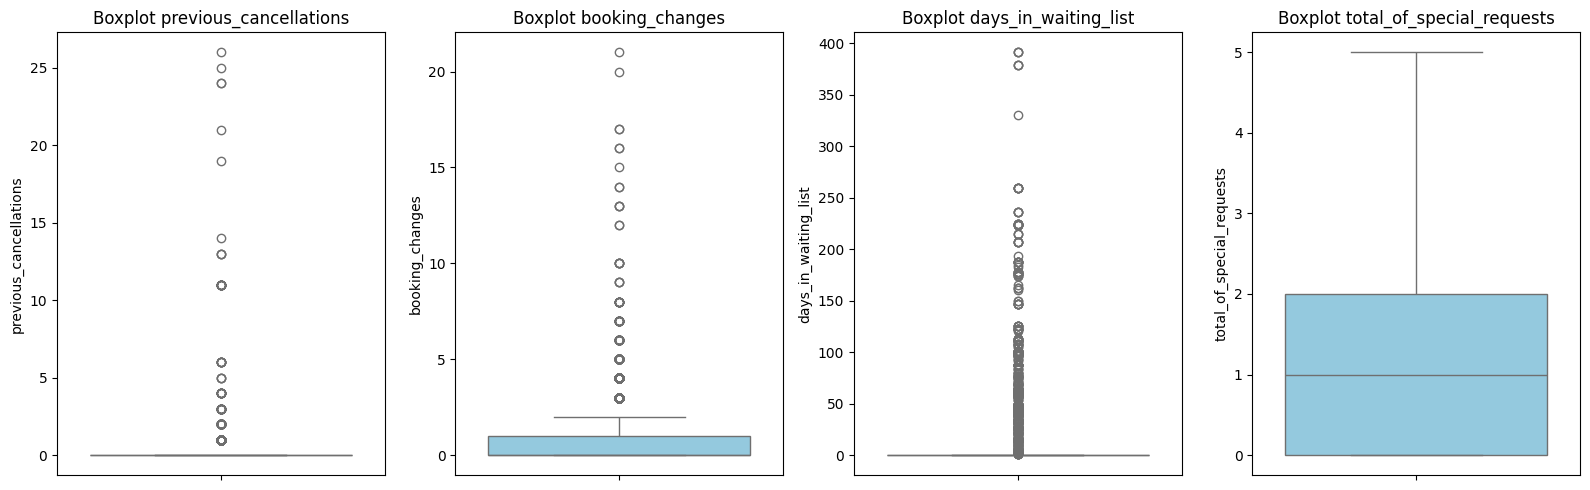

In [56]:
cols_outlier = ['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
            'total_of_special_requests']

fig, axes = plt.subplots(1, len(cols_outlier), figsize=(len(cols_outlier) * 4, 5))
for i, col in enumerate(cols_outlier):
    sns.boxplot(y=df_drop[col], ax=axes[i], color="skyblue") 
    axes[i].set_title(f"Boxplot {col}") 
    axes[i].set_ylabel(col) 
    axes[i].set_xticklabels([""]) 
plt.tight_layout()
plt.show()



terlihat jelas bahwa previous_cancellations, booking_changes dan days_in_waiting_list memiliki outlier global yang sangat banyak, dan total_of_special_requests disini tidak memiliki outlier karena memiliki distribusi yang normal

In [57]:
df_drop

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83515,GBR,Direct,0,2,No Deposit,0,Transient-Party,A,1,1,0
83543,CHN,Online TA,0,0,No Deposit,0,Transient-Party,C,0,2,0
83554,BEL,Groups,0,0,No Deposit,0,Transient-Party,A,0,1,0
83562,NLD,Online TA,0,0,No Deposit,0,Transient,B,0,0,0


In [58]:
X = df_drop.drop(columns=['country','is_canceled',])
y =df_drop['is_canceled']

kita mendefinisikan variabelnya yaitu:

**X** = market_segment, previous_cancellations, booking_changes,deposit_type	days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests

**y** = is_canceled

dimana kolom country kita tidak mengikutkan sebagai x

In [59]:
X.isna().value_counts()

market_segment  previous_cancellations  booking_changes  deposit_type  days_in_waiting_list  customer_type  reserved_room_type  required_car_parking_spaces  total_of_special_requests
False           False                   False            False         False                 False          False               False                        False                        10202
Name: count, dtype: int64

memastikan bahwa data yang null sudah tidak ada

### DATA SPLITING

In [60]:
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.20,
    random_state =42)

- digunakan untuk membagi dataset menjadi data latih dan data uji menggunakan fungsi train_test_split
- stratify=y, Memastikan proporsi kelas dalam data latih dan data uji tetap seimbang seperti pada dataset asli.
- test_size=0.20, 20% dari data digunakan sebagai data uji, sementara 80% sisanya digunakan sebagai data latih.

### Feature Engineering

kolom kategorikal reserved_room_type, market_segment, deposit_type, customer_type akan di onehot encoding  dan akan membuat ColumnTransformer untuk preprocessing

In [61]:
categorical_columns = ['reserved_room_type', 'market_segment', 'deposit_type', 'customer_type']

onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

preprocessing = ColumnTransformer([
    ('onehot', onehot_pipeline, categorical_columns)
], remainder='passthrough')  

X_train_preprocessed = preprocessing.fit_transform(X_train)
X_test_preprocessed = preprocessing.transform(X_test)
feature_names = preprocessing.get_feature_names_out()
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=feature_names)
print(feature_names)

['onehot__reserved_room_type_A' 'onehot__reserved_room_type_B'
 'onehot__reserved_room_type_C' 'onehot__reserved_room_type_D'
 'onehot__reserved_room_type_E' 'onehot__reserved_room_type_F'
 'onehot__reserved_room_type_G' 'onehot__reserved_room_type_H'
 'onehot__reserved_room_type_L' 'onehot__reserved_room_type_P'
 'onehot__market_segment_Aviation' 'onehot__market_segment_Complementary'
 'onehot__market_segment_Corporate' 'onehot__market_segment_Direct'
 'onehot__market_segment_Groups' 'onehot__market_segment_Offline TA/TO'
 'onehot__market_segment_Online TA' 'onehot__market_segment_Undefined'
 'onehot__deposit_type_No Deposit' 'onehot__deposit_type_Non Refund'
 'onehot__deposit_type_Refundable' 'onehot__customer_type_Contract'
 'onehot__customer_type_Group' 'onehot__customer_type_Transient'
 'onehot__customer_type_Transient-Party'
 'remainder__previous_cancellations' 'remainder__booking_changes'
 'remainder__days_in_waiting_list'
 'remainder__required_car_parking_spaces'
 'remainder__t

In [62]:
X_test_preprocessed_df.shape

(2041, 30)

In [63]:
X_train_preprocessed_df.shape

(8161, 30)

In [64]:
scaler = RobustScaler()
X_train_sca = scaler.fit_transform(X_train_preprocessed)
X_test_scd = scaler.transform(X_test_preprocessed)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sca, y_train)
X_train_preprocessed_df = pd.DataFrame(X_train_resampled, columns=feature_names)
X_test_preprocessed_df = pd.DataFrame(X_test_scd, columns=feature_names)
print("Jumlah data SMOTE:", X_train_preprocessed_df.shape)

Jumlah data SMOTE: (12460, 30)


disini kita sudah melakukan resempling sehingga jumlah datanya bertambah karena kita menggunakan smote untuk menyeimbangkan kelas yang minoritas.
- robust dan SMOTE akan saya jelaskan di bagian cross validation

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [66]:
logreg = LogisticRegression(C=0.1, solver='lbfgs', max_iter=1000, random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(class_weight='balanced',random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)

### CROSS VALIDATION

 menguji dengan cross validation untuk menemukan model terbaik dalam memprediksi pelanggan yang akan batal dengan menggunakan tolak ukur mean yang tinggi. kegunaan dalam menggunakan cross validation adalah  untuk mengukur kinerja model secara lebih akurat, terutamanya ketika kita mempunyai data yang terbatas dan memiliki kekurangan dari segi data. cross validation akan menuji data dan membuat subset untuk menghindari overfitting ataupun undervitting.

 **PIPELINE**
- Mengapa menggunakan pipeline ? : untuk Menghindari Data Leakage, agar Kode Lebih Rapi, Meningkatkan Efisiensi dan Memudahkan Hyperparameter Tuning .
 - Mengapa menggunakan RobustScaler?: untuk menskalakan fitur agar memiliki distribusi yang lebih stabil,di karenakan fitur terdapat outlier.
 - Mengapa menggunakan SMOTE?: Penggunaan SMOTE di karenakan dataset tidak seimbang antara kelas minoritas dan kelas mayoritas, nantinya SMOTE akan meningkatkan kelas minoritas dengan cara sintetis bukan dengan duplikasi.

In [67]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring_metric = 'recall' 
list_algo = [logreg, knn, tree, rf, gbc, ada]
list_all_score = []
list_mean = []
list_std = []

for model in list_algo:
    estimator = Pipeline([
        ('prep', preprocessing), 
        ('scaler', RobustScaler()),
        ('penyeimbang', SMOTE(random_state=42)), 
        ('model', model)  
    ])
    
    cv_score = cross_val_score(
        estimator=estimator,  
        X=X_train,  
        y=y_train,  
        cv=fold,  
        scoring=scoring_metric
    )  
   
    list_all_score.append(cv_score)  
    list_mean.append(round(cv_score.mean(), 4))  
    list_std.append(round(cv_score.std(), 4))

In [68]:
df_result = pd.DataFrame({
    'Model': ['LogReg', 'KNN', 'Tree', 'RandomForest', 'GBC', 'AdaBoost'],
    f'Mean {scoring_metric}': list_mean,
    f'Std {scoring_metric}': list_std,
    'All Scores': [list(map(lambda x: round(x, 2), scores)) for scores in list_all_score]  # Dibulatkan hanya untuk tampilan
})
df_result

,Model,Mean recall,Std recall,All Scores
0,LogReg,0.7809,0.0338,"[0.81, 0.77, 0.74, 0.83, 0.76]"
1,KNN,0.4319,0.0425,"[0.43, 0.36, 0.49, 0.44, 0.45]"
2,Tree,0.6748,0.0365,"[0.67, 0.63, 0.65, 0.74, 0.67]"
3,RandomForest,0.6825,0.0356,"[0.68, 0.65, 0.66, 0.75, 0.68]"
4,GBC,0.7519,0.0308,"[0.75, 0.73, 0.71, 0.79, 0.78]"
5,AdaBoost,0.7514,0.0181,"[0.74, 0.74, 0.74, 0.78, 0.76]"


dari hasil diatas maka model yang akan kita gunakan adalah Logistic Regression, dimana nilai meannya lebih tinggi di bandingkan model lain. model alternatif adalah gbc dan adaboost karena dari segi stdnya lebih stabil.

In [69]:
from sklearn.metrics import classification_report
estimator = Pipeline([
        ('prep', preprocessing), 
        ('scaler',RobustScaler()), 
        ('penyeimbang', SMOTE(random_state=42)),  
        ('model', logreg)  
        ])

estimator.fit(X_train, y_train)

# Prediksi
y_pred =estimator.predict(X_test)

# Cetak classification report
print("Classification Report - Logistik Regrsion")
print(classification_report(y_test, y_pred))

Classification Report - Logistik Regrsion
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1558
           1       0.43      0.79      0.56       483

    accuracy                           0.71      2041
   macro avg       0.67      0.73      0.67      2041
weighted avg       0.80      0.71      0.73      2041



kita akan fokus ke recall karena kita ingin memprediksi pelanggan yang akan membatalkan pesanan hotel, jadi yang kita harapkan setelah tuning kita akan bisa menemukan parameter terbaik untuk model kita agar bisa meningkatkan nilai recall

## Hyperparameter Tuning

setelah kita mendapatkan model yang bagus dalam cv, kita akan menggunakan hypertuning untuk mencari kombinasi parameter terbaik untuk menaikan nilai recall dengan menggunakan GridSearchCV diamana akan mencoba semua parameter, akan tetapi kekurangannya adalah tuning akan lama dikarenakan akan semua di coba parameternya.
- max iter: menentukan jumlah iterasi dalam model logistik regresi,Nilai [100, 200, 500, 1000]  model akan diuji dengan 4 iterasi untuk mencari nilai optimalnya.
- C : kegunaan C untuk mengurangi overfitting, np.logspace(-5, 5, 5) membuat 5 nilai parameter C dalam Logistic Regression menggunakan logaritma basis 10 dalam rentang 10⁻⁵ hingga 10⁵.


In [70]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold

In [71]:
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

estimator = Pipeline([
    ('prep', preprocessing), 
    ('scaler', RobustScaler()),  
    ('penyeimbang', SMOTE(random_state=42)),  
    ('model', LogisticRegression(solver='lbfgs',random_state=42))
])
param_grid = {
    'model__max_iter': [100,200,500, 1000],  
    'model__C': np.logspace(-5,5,5) 
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,  
    cv=5,  
    scoring='recall', 
    n_jobs=-1,  
    verbose=1  
)

grid_search.fit(X_train, y_train)
print("Best Recall Score:", grid_search.best_score_)
print("Best Params:", grid_search.best_params_)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Recall Score: 0.7856113855752367
Best Params: {'model__C': 316.22776601683796, 'model__max_iter': 500}


c:\Users\ASUS\OneDrive\Documents\python\Solution7\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


kita mendapatkan perameter terbaiknya yaitu C 316.227, max iternya 500 dan best scorenya 0,78

In [72]:
y_pred = grid_search.best_estimator_.predict(X_test)
joblib.dump(grid_search.best_estimator_, 'best_logistic_regression.pkl')

['best_logistic_regression.pkl']

Kita menyimpan modelnya

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1558
           1       0.43      0.80      0.56       483

    accuracy                           0.70      2041
   macro avg       0.67      0.73      0.67      2041
weighted avg       0.80      0.70      0.72      2041



setelah tuning kita mendapatkan nilai recallnya lebih besar di bandingka dengan sebelum tuning, ini menandakan bahwa tuning yang kita lakukan berhasil meningkatkan nilai recallnya, ini menunjukan parameter setelah tuning lebih bagus dalam meningkatkan nilai recall walaupun recallnya hanya meningkat 1 dari sebelumnya akan tetapi f1 score dan accuracy mangalami penurunan.

### 📊 Evaluasi Model setelah tuning dan melihat limitasi model

| **Metrik**  | **Kelas 0 (Tidak Membatalkan)** | **Kelas 1 (Membatalkan)** |
|------------|-------------------------------|--------------------------|
| **Precision** | 91%                         | 43%                      |
| **Recall**    | 67%                         | 80%                      |
| **F1-score**  | 77%                         | 56%                      |
| **Support**   | 1558 sampel                  | 483 sampel               |

- *precision* : Model akurat memprediksi tidak batal(0), akan tetapi kurang baik memprediksi batal(1).
- *Recall* :Model bagus memprediksi batal(1) di bandingkan dengan memprediksi tidak batal(0). 
- *F1-score* : **model sangat baik mengindentifikasi pelanggan yang tidak membatalkan** sebesar 0.81, akantetapi **kurang baik dalam mengidentifikasi pelanggan yang batal** (0.58)
- kalau di bandingkan dengan sebelum tuning, nilai dari setelah tuning recallnya naik akan tetapi dari accuracy turun setelah tuning, karena kita focus ke recall maka model yang kita gunakan adalah yang setelah tuning.

**limitasi model**

Berdasarkan analisis diatas, model fokus pada recall untuk mendeteksi pelanggan yang membatalkan pesanan (1). Meskipun recall meningkat setelah tuning, akurasi justru mengalami penurunan. untuk limitasi model saya akan menjelaskan lebih medalam di kurva PRC untuk melihat kinerja model terutama hubungan recall dan Precision apa hubungannya dengan accuracy.




In [74]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, recall_score
y_train_pred =grid_search.best_estimator_.predict(X_train)
y_test_pred = grid_search.best_estimator_.predict(X_test)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train Recall:", recall_score(y_train, y_train_pred))
print("Test Recall:", recall_score(y_test, y_test_pred))

Train Accuracy: 0.696605808111751
Test Accuracy: 0.7006369426751592
Train Recall: 0.7933713102019679
Test Recall: 0.7950310559006211


### 📊 Evaluasi recall dan accuracy

| **Metrik**  | **train** | **test** |
|------------|-------------------------------|--------------------------|
| **Accuracy** |0.6967                       | 0.701                     |
| **Recall**    | 0.793                         | 0.795                     |

- Dalam kasus ini, kita lebih fokus pada mendeteksi pembatalan pemesanan hotel, sehingga recall lebih penting dibandingkan akurasi. Akurasi tidak dapat sepenuhnya dijadikan tolak ukur karena cenderung hanya menebak pemesanan sebagai "tidak batal," tanpa benar-benar mampu mendeteksi pemesanan yang akan dibatalkan. karena sesuai dengan rumus akurasi, yaitu perbandingan antara jumlah prediksi yang benar dengan total data, yang tidak memperhitungkan keseimbangan antara kelas dalam data yang tidak seimbang.
- pentingannya recall dalam mendeteksi pembatalan pesanan hotel dengan benar karena berdasarkan rumusnya TP / TP + FN, Dimana TP(True Positif) semakin besar maka model akan baik mendeteksi pemesanan yang akan batal

- ini menunjukan model yang saya buat memiliki performa yang konsisten( dapat di percaya), karena perbedaan recall test dan recall train  tidak memiliki gap yang besar

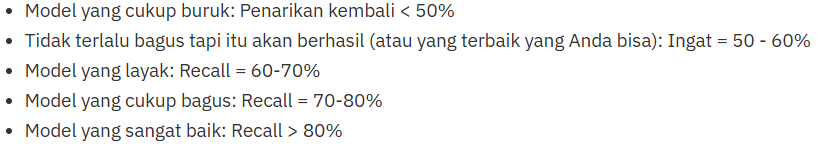

dari sumber diatas bahwa model kita sudah bagus  dan dapat di percaya untuk menangkap pembatalan yang akan terjadi

sumber https://support.madkudu.com/hc/en-us/articles/4407471867405-Recall-and-Precision-how-is-the-performance-of-a-prediction-model-measured



In [75]:
df_prediksi = pd.DataFrame(X_test.copy())  
df_prediksi['Y_actual'] = y_test 
df_prediksi['Y_predicted'] = y_test_pred 
df_prediksi  

,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,Y_actual,Y_predicted
35860,Direct,0,0,No Deposit,0,Transient-Party,C,1,3,0,0
11799,Online TA,0,2,No Deposit,0,Transient,D,0,1,0,1
45196,Aviation,0,0,No Deposit,0,Transient,A,0,0,0,0
79903,Online TA,0,2,No Deposit,0,Transient,A,0,3,0,0
26991,Online TA,0,0,No Deposit,0,Transient-Party,D,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
71217,Online TA,0,1,No Deposit,0,Transient-Party,A,0,0,0,1
7570,Complementary,0,0,No Deposit,0,Transient,E,0,1,0,0
18158,Direct,0,0,No Deposit,0,Transient-Party,D,0,3,0,0
37868,Direct,0,1,No Deposit,0,Contract,A,1,2,0,0


### MELIHAT HUBUNGAN RECALL DAN PRECISION MENGGUNAKAN PRC

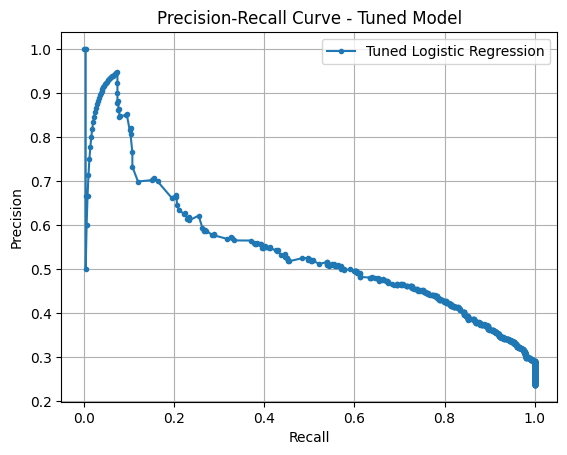

In [76]:
from sklearn.metrics import precision_recall_curve
y_test_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
plt.plot(recall, precision, marker='.', label="Tuned Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Tuned Model")
plt.legend()
plt.grid()
plt.show()


- di awal curva precision  sangat tinggi tetapi recall sangat rendah, artinya model kita hanya memprediksi kelas positif dengan benar tetapi false positif sangat tinggi 
- ketika recall meningkat precision mulai mengalami penurunan, artinya model sudah menagkap banyak pelanggan yang akan batal, tetapi prediksinya banyak yang false positif.
- jika recall mendekati 1 menandakan model hampir semuanya yang di prediksi  benar akan membatalkan pesanannya, akan tetapi model juga banyak kesalahan  prediksi pelanggan yang tidak akan membatalkan karena model kita punya kekurangan dalam menyeimbangkan recall dan precision, sehingga ketika kita akan meningkatkan treshold dari recall, maka recall akan naik tetapi nilai accuracy akan turun.

dari hasil analisis diatas menandakan recall sangat baik prediksi pelanggan yang akan batal pada data yang tidak seimbang, kekurangannya adalah lebih banyak prediksi tidak membatalkan tetapi di prediksi batal, inilah limitasi dari model kita, ketika kita manaikan recall false positif akan meningkat, sudah pasti nilai f1 score dan accurcy akan turun.

### ANALISIS CONFUSION MATRIKS


Classification Report:


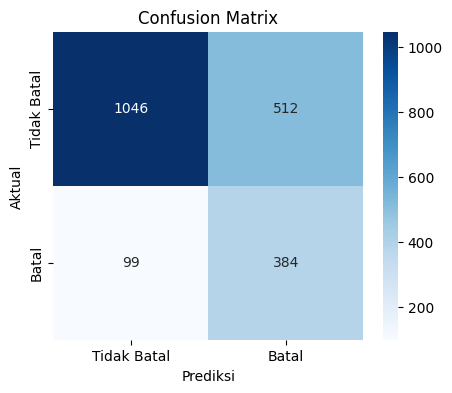

In [77]:
print("\nClassification Report:")
CM = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(CM , annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Batal', 'Batal'], yticklabels=['Tidak Batal', 'Batal'])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

### 📊 Evaluasi confusion matrix
| **komponen AUC**  | **penjelasan** |
|------------|-------------------------------|
| **True Negative (TN) 1046** |Prediksi tidak batal dengan benar                  | 
| **False Positive (FP) 512**    | prediksi batal yang sebenarnya tidak batal                        |
| **False Negative (FN) 99** |     prediksi tidak batal yang sebenarnya batal           | 
| **True Positive (TP) 384**    | prediksi batal dengan benar                    |


recall di hitung dengan membandingkan prediksi benar kelas positif(TP) dengan semua data yang benar benar positif(TP + FN). apabila recall tinggi maka model dapat memprediksi sebagian besar yang akan membatalkan, perhitungan recall sebagai berikut :
$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{384}{384 + 99} = \frac{384}{483} \approx 0.795
$$

ini menunjukan model mampu memprediksi pelanggan yang akan membatalkan sebesar 79.5% secara benar akan membatalkan, dan nilai FN sebesar 99 yang artinya ini cukup kecil di bandingkan dengan TP 384 artinya model gagal memprediksi sebesar 20.5% pelanggan yang akan membatalkan pemesanannya.


nilai recall yang hampir 80% menunjukan bahwa model cukup bagus dalam memprediksi pelanggan yang akan membatalkan sehingga manager pelayanan produk lebih cepat mengidentifikasi pelanggan yang akan membatalkan dan akan mengurangi peluang kehilangan keuntungan, untuk strategi apa yang akan kita lakukan terhadap hasil model kita berikan akan kita bahas di akhir.



### MELIHAT KEMAMPUAN FITUR TERHADAP POTENSI PEMBATALAN HOTEL SEBAGAI BAHAN EVALUASI PENINGKATAN PELAYANAN

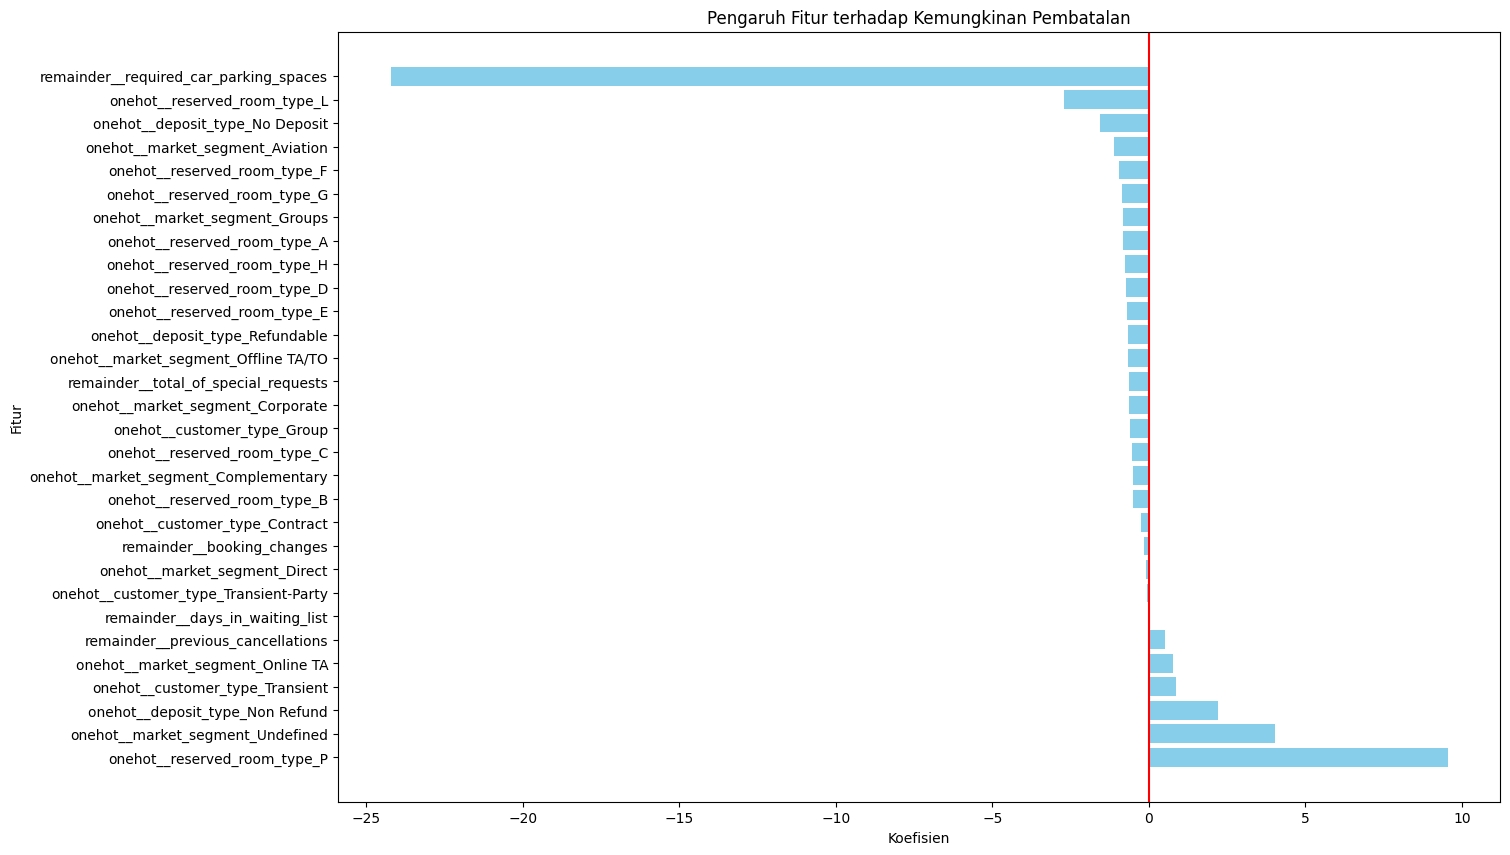

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Ambil model terbaik dari GridSearch
model_best_logreg = grid_search.best_estimator_.named_steps['model']
feature_names = grid_search.best_estimator_.named_steps['prep'].get_feature_names_out()
coef = model_best_logreg.coef_[0]
df_coef = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})
df_coef = df_coef.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(15, 10))
plt.barh(df_coef['Feature'], df_coef['Coefficient'], color='skyblue')
plt.xlabel("Koefisien")
plt.ylabel("Fitur")
plt.title("Pengaruh Fitur terhadap Kemungkinan Pembatalan")
plt.axvline(x=0, color='red', linestyle='-') 
plt.show()

### 📊 Evaluasi Fitur berdasarkan nilai koefisiennya
| **Jenis fitur pelanggan rendah untuk membatalkan** | **Jenis fiturn berpeluang tinggi untuk  membatalkan**
|-------------------------------|-------------------------------
|required_car_parking_spaces                 | reserved_room_type_P
| room_type_ L                       |market_segment_Undefined
| deposit_type_No Deposit           | deposit_type_Non Refund




**Fitur koefisien positif lebih berpeluang membatalkan pesanan hotel**

nilai koefisien positif menandakan bahwa ada hubungan positif atau hubungan searah tehadap pembatalan pemesanan, yang dimana nilai cencel 1 dan tidak cencel 0 maka jika koefisiennya positif maka ada kemungkinan besar untuk mebatalkan di bandingkan dengan nilai yang negatif. contoh perhitungan dari rumus logreg 

$$
P(Y = 1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}}
$$
- contoh perhitungan fitur yang negatif (fitur required_car_parking_spaces)
$$
P = \frac{1}{1 + e^{-25}}
$$

$$
P \approx 1.39 \times 10^{-11}
$$

$$
P = \frac{1}{1 + e^{-25}} = 0.00000000001
$$

Karena koefisiennya negatif (-25), fitur required_car_parking_spaces secara drastis menurunkan probabilitas pembatalan jika aktif (jika pelanggan memilih fitur ini).

- contoh perhitungan fitur yang positif (market_segment_Undefined)
$$
P = \frac{1}{1 + e^{-4}} = 0.98201379
$$

Karena koefisiennya positif (4), fitur market_segment_Undefined secara drastis menaikan probabilitas pembatalan jika aktif (jika pelanggan memilih fitur ini).

refrensi pendukung: https://www.ibm.com/id-id/topics/logistic-regression

**Fitur required car parking spaces** 
- koefisien bernilai negatif, apabila pelanggan memesan tempat parkir probabilitas pemesanan yang di batalkan akan berkurang
- manager harus banyak mempunyai lahan parkir agar meminimalisir pembatalan pemesanan

**Fitur tipe L** 
- dalam nilai koefisiennya  memang negatif akan tetapi pemesanan tipe L hanya 2 yang memesan dalam data ini, terlalu sedikit jika kita menyimpulkan bahwa tipe l akan mengurangi pembatalan


**Fitur deposit_type_No Deposit** 
- koefisien bernilai negatif, apabila pelanggan memilih alternatif no deposit probabilitas pemesanan yang akan batal akan berkurang.
- manager harus membuat keputusan tentang no deposit agar bisa meminimalisir pembatalan pemesanan, ini dikarenakan pelanggan tidak mengeluarkan uang pada saat booking di awal, pelanggan cenderung akan tetap pada reservasi hotel.

**market_segment_Undefined**
- nilai koefisienya positif, ini menunjukan ada hubungan positif terhadap pembatalan pemesanan dalam artian pelanggan lebih besar probabilitasnya dalam membatalkan pesanan hotel. terlalu sedikit jika kita menyimpulkan bahwa market_segment_Undefined akan meningkatkan pembatalan.



**reserved_room_type_P**
- Nilai koefisiennya positif akan tetapi jumlah pemesanannya hanya 4, ini terlalu sedikit jika kita langsung menyimpulkan bahwa room type P akan meningkatkan pembatalan

**deposit_type_Non Refund**
- koefisien bernilai positif, yang artinya apabila pelanggan memilih alternatif Non Refund probabilitas pemesanan yang batal akan meningkat di karenakan ada hubungan positif.
- manager harus membuat keputusan tentang Non Refund agar bisa meminimalisir pembatalan pemesanan


### kenapa analisis fitur setelah mendapatkan model itu  sangat penting
Di karenakan model hanya suatu alat untuk kita memprediksi pembatalan pemesanan, hasil dari prediksinya kita evaluasi agar kita tahu kekurangan dan kelebihan dari fitur-fitur kita, yang kita harapkan semua fitur akan berhubungan negatif terhadap pembatalan pemesana, itulah alsan kenapa kita harus evaluasi fiturnya. **Perlu diingat** bahwa model bukan hanya sekedar memprediksi pembatalan atau tidak membatalkan, akan tetapi model juga memperlihatkan seberapa **buruk pelayanan kita ke konsumen** lewat hasil prediksi fiturnya maka itu kita harus memperbaiki atau memaksimalkan pelayanan kita lewat fitur atau produk jasa yang kita tawarkan. Kita juga tidak bisa menjadikan tolak ukur fitur yang bernilai negatif itu akan berpeluang besar menghindari pembatalan pemesanan, dikarenakan kita juga harus mencoba kombinasi di semua fiturnya. Inilah tujuan dari evaluasi fitur, karena model kita terlalu banyak memprediksi false positif maka cara kita menutup kekurangan model adalah dengan mengevaluasi fitur yang berdampak pada pembatalan, pada penjelasan berikutnya saya akan memperlihtakan seberapa besar pengaruh fitur kalau kita lebih memaksimalkan dan evaluasi fiturnya.


### MELIHAT KONTRIBUSI FITUR TERHADAP MODEL

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


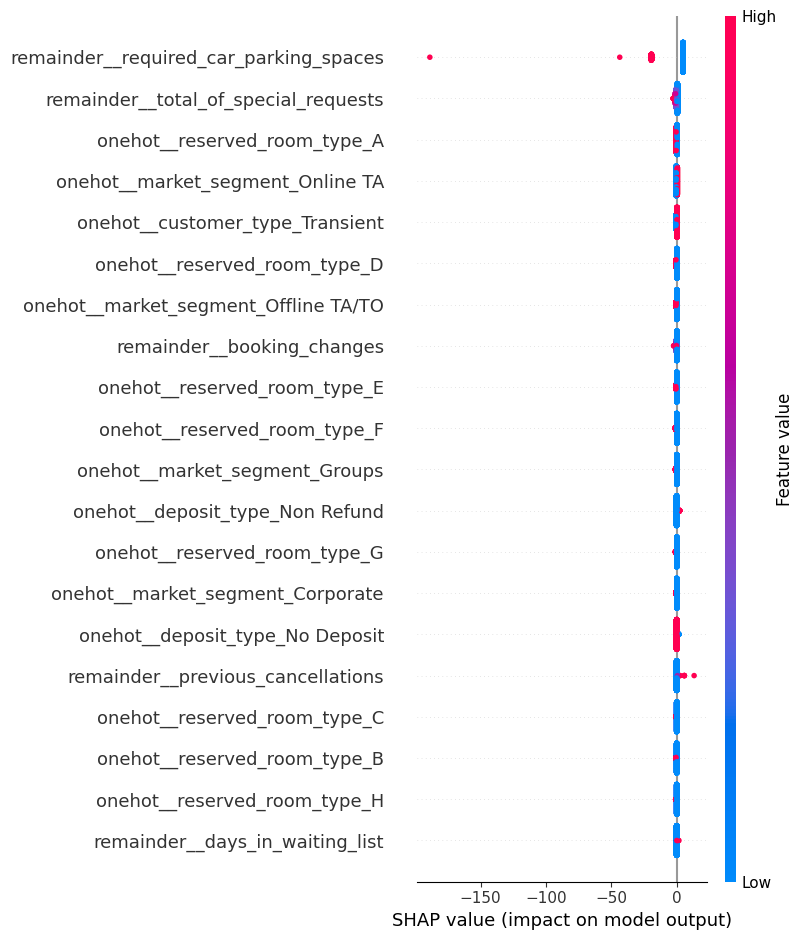

In [79]:
import shap
X_test_preprocessed_shap = grid_search.best_estimator_.named_steps['prep'].transform(X_test)

# Buat explainer SHAP
explainer = shap.Explainer(model_best_logreg, X_test_preprocessed_shap)
shap_values = explainer(X_test_preprocessed_shap)

# Plot SHAP summary
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, feature_names=feature_names)


Fungsi dari SHAP adalah menunjukan dampak pengaruh setiap fitur dalam konteks semua fitur lain. 

saya akan menjelaskan maksud dari warna diatas
- Biru → Nilai fitur rendah.
- Merah → Nilai fitur tinggi.

| **Fitur**                      | **Koefisien Regresi** | **SHAP Value** | **Interpretasi** |
|--------------------------------|----------------------|--------------|-----------------------------------------------|
| `required_car_parking_spaces`  | Negatif              | Negatif      | Lebih banyak ketersediaan tempat parkir lebih kecil untuk pembatalan |
| `reserved_room_type_P`         | Positif              | Positif      | Memilih room_type_P  lebih besar untuk pembatalan |
| `reserved_room_type_L`         | Negatif              | Negatif      | Memilih room_type_L lebih kecil untuk pembatalan |
| `market_segment_Undefined`     | Positif              | Positif      | Market segment _Undefined lebih besar untuk pembatalan |
| `deposit_type_No Deposit`      | Positif              | Positif      | Tidak membayar deposit lebih besar untuk pembatalan |
| `deposit_type_Non Refund`      | Negatif              | Negatif      | Membayar deposit non-refundable lebih kecil untuk pembatalan |
| `previous_cancellations`       | Positif              | Positif      | Semakin banyak pembatalan sebelumnya  lebih besar untuk pembatalan |
---

**RECOMENDASI**
 untuk kamar room type p , dapat kita berikan penawaran khusus, untuk room type L dapat di tingkatkan ketersediaan kamarnya. memperbayak lahan parkir atau penawaran parkir gratis agar mendorong pelanggan  tidak membatalkan pemesanannya, di karenakan required_car_parking_spaces pengaruhnya tehadap pembatalan sangat kecil



# MENGUJI MODEL PADA DATA BARU DAN MELIHAT SEBERAPA BESAR PENGARUH KOMBINASI FITUR

saya akan menguji model pada data baru, dan juga saya akan membandingkan fitur yang koefisiennya negatif dan koefisien positif terhadap pengaruh pembatalan pemesanan

bada baris pertama saya akan memaksimalkan kombinasi fitur yang negatif dan pada baris kedua saya akan memaksimalkan kombinasi fitur yang positif, agar kita bisa tau seberapa pengaruh fitur yang bernilai negatif dan positif

In [80]:
model = joblib.load('best_logistic_regression.pkl')
Data_baru = pd.DataFrame({
    'market_segment': ['Aviation', 'Online'],	
    'previous_cancellations': [0, 1],
    'booking_changes': [2, 3],
    'deposit_type': ['No Deposit', 'Non Refund'],
    'days_in_waiting_list': [0, 5],
    'customer_type': ['Group', 'Transient'],	
    'reserved_room_type': ['L', 'D'],	
    'required_car_parking_spaces': [3, 0],
    'total_of_special_requests': [3, 1]
})
pred_new_data = model.predict(Data_baru)
Data_baru['prediksi'] = pred_new_data 
Data_baru

,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,prediksi
0,Aviation,0,2,No Deposit,0,Group,L,3,3,0
1,Online,1,3,Non Refund,5,Transient,D,0,1,1


Dalam tabel hasil prediksi menunjukan  bahwa kombinasi fitur  yang bernilai negatif ( baris pertama pada data frame) kemungkinan menurunkan pembatalan, dan pada baris ke 2 menunjukan bahwa  bahwa kombinasi fitur yang bernilai positif berkemungkinan mempengaruhi pembatalan.

Ini bagus untuk bahan evaluasi dari kombinasi fitur kita, bahwa ada beberapa fitur yang harus di maksimalkan contohnya pada required_car_parking_spaces dimana manager harus menambahkan lahan parkir yang lebih luas, dan juga fitur yang bernilai positif harus di avalusi lebih dalam lagi kenapa fitur tersebut bisa meningkatkan pembatalan contohnya customer_type Transient dimana fitur tersebut positif kuat terhadap pembatalan, ini di karenakan pelanggan tersebut memesan kamar hotel jangka pendek sehingga lebih gampang untuk mengubah perencanaan pemesanan.

# STRATEGI TERHADAP HASIL PREDIKISI PELANGGAN YANG AKAN MEMBATALKAN

**PENERAPAN OVERBOOKING**

overbooking adalah kita akan memperbanyak reservasi kamar hotel dari jumlah kamar hotel yang tersedia. Tujuannya adalah memaksimalkan pendapatan terhadap pembatalan pemesanan kamar hotel. dimana kita akan melakukan overbooking pada kamar hotel yang di prediksi mambatalkan pesanan

**KERJASAMA DENGAN HOTEL LAIN**

Melakukan kerjasama dengan hotel lain untuk mengalihkan pelanggan hotel yang di prediksi membatalkan tetapi tidak batal,
kalau prediksi kita salah terhadap pelanggan yang sebenarnya tidak batal tapi di prediksi batal dan kita sudah melakukan overbooking kamar dimana kita sudah menawarkan kamar ke konsumen lain maka kita akan mengalihkan pelanggan tersebut ke hotel yang kita ajak bekerjasama dengan fasilitas standar yang sama.

**KERUGIAN KONSUMEN ATAS KEPUTUSAN OVEBOOKING**

Segala bentuk kerugian yang di alami konsumen terhadap penerapan overbooking akan di tanggung oleh manager.


### KESIMPULAN  
-  berdasarkan nilai meanya Model paling baik untuk memprediksi pelanggan yang berpotensi akan membatalkan menggunakan matriks evaluasi recall.
- Model bagus dalam di uji di data baru, karena model tidak mengalami overfitting denga tolak ukurnya adalah perbedaan recall train dan test tidak berbeda signifikan.
- Model dalam penelitian ini cukup baik dalam memprediksi pelanggan yang akan membatalkan pesananya dengan nilai recallnya 79,5% dimana hampir 80% prediksi berhasil terhadap pelanggan yang akan membatalkan
- Kekurangan dari model ini adalah semakin tinggi nilai recallnya maka false positif akan meningkat sehingga menurunkan tingkat accuracy
- pengambilan keputusan dan strategi yang kita ambil setelah model di dapatkan yaitu menerapkan overbooking terhadap pelanggan yang di prediksi batal memesan kamar hotel, dan kerjasama dengan hotel lain untuk kesalahan prediksi terhadap pelanggan yang sebenarnya tidak batal tetapi di prediksi batal dengan mengalihkan ke hotel yang kita ajak kerjasama.


### SARAN UNTUK PENELITI SELANJUTNYA
**Batasan dalam Data**

Ada beberapa fitur yang tidak berkontribusi dalam peningkatan model, lakukan Feature selction lebih mendalam agar fitur yang penting saja yang di gunakan.

**Batasan dalam model**

Model tidak bisa memiliki precision dan recall tinggi secara bersamaan, di karenakan berdasarkan analisis PRC precision dan recall memiliki hubungan yang tidak searah. Mencoba model clasifikasi yang lain seperti random Forest, XGBoost dan Adaboost

**Batasan waktu yang lama**

Waktu training yang lama, karena model ini menggunakan GridSearchCV untuk tuning, coba menggunakan RandomizedSearchCV agar mempercepat penemuan parameter lebih cepat 



